# • Utilizando um Modelo de Regressão Logística para Estimar a Probabilide de Inadimplência de Clientes •


---
## • Introdução •

### Objetivos
Este projeto tem como objetivo a criação de um modelo pereditivo para estimar da probabiliade de inadimplecia de clientes com base nos dados de treino. Para tal foi escolhida a regreção logistica, um modelo bem conhecido para problemas de classificação, dado que ela, usualmente na forma $f(x) = \dfrac{1}{1 + e^{-x}}$ , sendo uma função continua com dominio no conjunto do reais $\mathbb{R}$ e imagem como sendo o intervalo $]0,1[$, permitindo assim interpretar os valores de regreção agora como probabilidades.

### Sobre os Dados
Os dados para este projeto froma retirados de quatro conjuntos no formarto `.csv` com informações sobre os clientes que foram utilizados no treinamento,teste e ajuste do modelo. Os conjuntos de dados utilizados são:
 - base_cadastral
 - base_info
 - base_pagamentos_desenvolvimento
 - base_pagamentos_teste


### Ferramentas Utilizadas
Segue alista de ferramentas, linguagens e bibliotecas utilizadas nesse projeto, bem como suas justificativas de escolha.

- `Python:` Linguagem de programação com uma grande gama de ferramentas para modelagem matemérica e estatística, bem como várias bibliotecas com funções que facilitam o processo de criação de modelos de *machine learning*.

- `Visual Studio Code:` Escolhi esse por ser o editor de código fonte gratuito ao qual eu estou acostumado a utilizar em meus projétos.

- `Jupyter Notebook:` Por ser uma ferramenta que permite a combinar comandos em python, juntamente com as explicações em markdawn e apresentação dos gráficos.

- `Pandas:` Biblioteca do Python utilizada para manipulação e tratamento dos dados.

- `Sklearn:`Biblioteca do Python com funções de machine learning e modelgame estatística.

- `Numpy:` Biblioteca do Python que possui várias funções matemáticas e estatístias que facilitam a construção de arrays e modelgame matemática.

- `Matplotlib:` Biblioteca do Python que possui várias funções de plotagem de gráficos.

- `Seaborn:` Mais uma biblioteca do Python para visualização de gráficos.

Segue também junto com esse Notebook Jupyter, um arquivo `requirements.txt` com as respectivas versões de cada biblioteca.



### Etapas do Desenvolvimento do Modelo
1. **Análise Exploratória dos Dados:** Tem por objetivo ter uma primeira visão dos dados, permitindo assim a verificação de valores *missing* ou *outliers* a serem tratados em futuros tratamentos de *Feature Engineering*.


2. **Tratamento dos Dados:** Parte muito importante para que o modelo seja bom na predição, possui várias etapas, sendo algumas realizar *Feature Engineering* nas datas (separando mês de ano, de dia e etc..), tratamento dos valores *missing* nas variáveis numéricas e categóricas, separação de dados de treino e teste e dentre outros processos.


3. **Treinamento o Modelo:** Após a preparação dos dados e sua separação em treinamento e teste, vamos realizar o treinamento do modelo ajustando os valores dos coeficientes de regressão pela minimização da função de custo, depois aplicar a função logística para obtermos a probabilidade da variável *target* dada as variáveis preditoras.


4. **Avaliando o Modelo:** Dados os primeiros resultados do treinamento, será feito uma avaliação do desempenho do modelo com base em algumas métricas, como avaliação de *overfitting* e *underfitting*, *Classification Report*, *Recall* dentre outras.


5. **Aprimorando o Modelo:** Feita a avaliação e ajuste do modelo, será aplicado técnicas *Recursive Feature Elimination*, *validação cruzada* dentre outras para seleção das variáveis mais significativas para o modelo, e melhora do desempenho deste.


6. **Aplicando o Modelo:** Feitos os ajuste necessários, podemos aplicar o modelo no conjunto de dados de validação, que contém informações de clientes que ainda não realizaram o pagamento, para assim prevermos suas respectivas probabilidades de inadimplência ou não.


7. **Considerações Finais:** Elencando os principais pontos positivos e negativos sobre o modelo, bem como recomendando possíveis aprimoramentos futuros.





---
## 1. Análise Exploratória dos Dados


### 1.1. Instalando e Importando Bibliotecas

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd   #manipulação dos dados
import numpy as np    #funçoes matemáticas
import matplotlib.pyplot as plt   #criação de gráficos
import seaborn as sns   #mais funções matemáticas
import sklearn  #funçõs de machine learning
%matplotlib inline

### 1.2. Importando os Dados

In [ ]:
#mude para os caminhos dos arquivos em seu computador
dados_cad = r'D:\1 - CODIGOS\Projeto Datarisk\Projeto\Dados\base_cadastral.csv'
dados_inf = r'D:\1 - CODIGOS\Projeto Datarisk\Projeto\Dados\base_info.csv'
dados_pag_des = r'D:\1 - CODIGOS\Projeto Datarisk\Projeto\Dados\base_pagamentos_desenvolvimento.csv'
dados_pag_test = r'D:\1 - CODIGOS\Projeto Datarisk\Projeto\Dados\base_pagamentos_teste.csv'

In [4]:
df_1 = pd.read_csv(dados_cad, sep = ';')    #base_cadastral
df_2 = pd.read_csv(dados_inf, sep = ';')    #base_info
df_3 = pd.read_csv(dados_pag_des, sep = ';')  #base_pagamentos_desenvolvimento
df_4 = pd.read_csv(dados_pag_test, sep = ';') #base_pagamentos_teste

### 1.3. Explorando os Dados

In [5]:
#Verifica as dimensões de cada conjunto de dados
df_1.shape

(1315, 8)

In [6]:
df_2.shape

(24401, 4)

In [7]:
df_3.shape

(77414, 7)

In [8]:
df_4.shape

(12275, 6)

In [9]:
#retorna as peimeiras 5 linhas da tabela
df_1.head() #base_cadastral

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62


In [10]:
df_2.head() #base_info

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,NaN
1,8274986328479596038,2018-09,106430.0,141.0
2,345447888460137901,2018-09,707439.0,99.0
3,1003144834589372198,2018-09,239659.0,96.0
4,324916756972236008,2018-09,203123.0,103.0


In [11]:
df_3.head() #base_pagamentos_desenvolvimento

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99


In [12]:
df_4.head() #base_pagamentos_teste

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99


### 1.4. Realizando o Tratamento nas Datas

In [13]:
df_1['DATA_CADASTRO'].dtype

dtype('O')

In [14]:
df_2['SAFRA_REF'].dtype

dtype('O')

In [15]:
df_3['DATA_PAGAMENTO'].dtype

dtype('O')

In [16]:
df_4['DATA_EMISSAO_DOCUMENTO'].dtype

dtype('O')

Podemos ver que formato da data em cada tabela está como *Object*, o que não é bom para as manipulações que precisarão ser feitas, vamos assim tratar disso.

In [17]:
df_1['DATA_CADASTRO'] = pd.to_datetime(df_1['DATA_CADASTRO'])

In [18]:
df_2['SAFRA_REF'] = pd.to_datetime(df_2['SAFRA_REF'])

In [19]:
df_3['SAFRA_REF'] = pd.to_datetime(df_3['SAFRA_REF'])
df_3['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(df_3['DATA_EMISSAO_DOCUMENTO'])
df_3['DATA_PAGAMENTO'] = pd.to_datetime(df_3['DATA_PAGAMENTO'])
df_3['DATA_VENCIMENTO'] = pd.to_datetime(df_3['DATA_VENCIMENTO'])

In [20]:
df_4['SAFRA_REF'] = pd.to_datetime(df_4['SAFRA_REF'])
df_4['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(df_4['DATA_EMISSAO_DOCUMENTO'])
df_4['DATA_VENCIMENTO'] = pd.to_datetime(df_4['DATA_VENCIMENTO'])

### 1.5. Analizando as Variáveis Categóricas

In [21]:
categorica_1 = [var for var in df_1.columns if df_1[var].dtype == 'O' ]
print('Existm {} variáveis categóricas\n'.format(len(categorica_1)))
print('As variáveis categóricas são:', categorica_1)

Existm 6 variáveis categóricas

As variáveis categóricas são: ['DDD', 'FLAG_PF', 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG']


In [22]:
categorica_2 = [var for var in df_2.columns if df_2[var].dtype == 'O' ]
print('Existm {} variáveis categóricas\n'.format(len(categorica_2)))
print('As variáveis categóricas são:', categorica_2)

Existm 0 variáveis categóricas

As variáveis categóricas são: []


In [23]:
categorica_3 = [var for var in df_3.columns if df_3[var].dtype == 'O' ]
print('Existm {} variáveis categóricas\n'.format(len(categorica_3)))
print('As variáveis categóricas são:', categorica_3)

Existm 0 variáveis categóricas

As variáveis categóricas são: []


In [24]:
categorica_4 = [var for var in df_4.columns if df_4[var].dtype == 'O' ]
print('Existm {} variáveis categóricas\n'.format(len(categorica_4)))
print('As variáveis categóricas são:', categorica_4)

Existm 0 variáveis categóricas

As variáveis categóricas são: []


Concluimos que a única tabela com variáveis categóricas é **base_cadastral**, e também a quantidade e nome das variáveis categóricas nessa tabela.

#### Verificando valores *missing* nas variáveis categóricas

In [25]:
df_1[categorica_1].isnull().sum()

DDD                     237
FLAG_PF                1249
SEGMENTO_INDUSTRIAL      83
DOMINIO_EMAIL            30
PORTE                    41
CEP_2_DIG                 0
dtype: int64

### 1.6. Analizando as Variáveis Numéricas

Assim como no caso das categóricas, vamos ver quantas variáveis, agora numéricas, temos de cada tabela.

In [26]:
numerica_1 = [var for var in df_1.columns if df_1[var].dtype != 'O']
print('Existm {} variáveis numéricas\n'.format(len(numerica_1)))
print('As variáveis numéricas são:', numerica_1)

Existm 2 variáveis numéricas

As variáveis numéricas são: ['ID_CLIENTE', 'DATA_CADASTRO']


In [27]:
numerica_2 = [var for var in df_2.columns if df_2[var].dtype != 'O']
print('Existm {} variáveis numéricas\n'.format(len(numerica_2)))
print('As variáveis numéricas são:', numerica_2)

Existm 4 variáveis numéricas

As variáveis numéricas são: ['ID_CLIENTE', 'SAFRA_REF', 'RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS']


In [28]:
numerica_3 = [var for var in df_3.columns if df_3[var].dtype != 'O']
print('Existm {} variáveis numéricas\n'.format(len(numerica_3)))
print('As variáveis numéricas são:', numerica_3)

Existm 7 variáveis numéricas

As variáveis numéricas são: ['ID_CLIENTE', 'SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO', 'VALOR_A_PAGAR', 'TAXA']


In [29]:
numerica_4 = [var for var in df_4.columns if df_4[var].dtype != 'O']
print('Existm {} variáveis numéricas\n'.format(len(numerica_4)))
print('As variáveis numéricas são:', numerica_4)

Existm 6 variáveis numéricas

As variáveis numéricas são: ['ID_CLIENTE', 'SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO', 'DATA_VENCIMENTO', 'VALOR_A_PAGAR', 'TAXA']


Com isso, temos também uma lista das variáveis numéricas de cada tabela.


#### Verificando valores *missing* nas variáveis numéricas

In [30]:
df_1[numerica_1].isnull().sum()

ID_CLIENTE       0
DATA_CADASTRO    0
dtype: int64

In [31]:
df_2[numerica_2].isnull().sum()

ID_CLIENTE               0
SAFRA_REF                0
RENDA_MES_ANTERIOR     717
NO_FUNCIONARIOS       1252
dtype: int64

In [32]:
df_3[numerica_3].isnull().sum()

ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1170
TAXA                         0
dtype: int64

In [33]:
df_4[numerica_4].isnull().sum()

ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_VENCIMENTO             0
VALOR_A_PAGAR             131
TAXA                        0
dtype: int64

Note que temos alguns valores nulos de variáveis numéricas em algumas tabelas, tais valores deverão ser tratados mais adiante.

#### Verificando *Outliers* nas variáveis numéricas

Note que, nesse contexto, não faz sentido avaliar as estatísticas do `ID_CLIENTE`, dado que esta variável não possui significado quantitativo, mas serve apenas para distinção entre os clientes. Deste modo, vamos verificar outliers apenas refrente as datas. Isso pode ser feito por uma descrição dos dados e pela visualização dos histogramas das frequências.

In [34]:
#Nos dá um resumo das estatísticas básicas dos dados
print(df_1['DATA_CADASTRO'].describe())

count                             1315
mean     2013-07-25 11:06:53.384030208
min                2000-08-15 00:00:00
25%                2011-02-14 00:00:00
50%                2014-11-17 00:00:00
75%                2018-10-26 12:00:00
max                2021-07-18 00:00:00
Name: DATA_CADASTRO, dtype: object


In [35]:
print(df_2['SAFRA_REF'].describe())

count                            24401
mean     2020-05-05 20:33:41.228638208
min                2018-09-01 00:00:00
25%                2019-07-01 00:00:00
50%                2020-06-01 00:00:00
75%                2021-03-01 00:00:00
max                2021-12-01 00:00:00
Name: SAFRA_REF, dtype: object


In [36]:
print(df_3['SAFRA_REF'].describe())
print(df_3['DATA_EMISSAO_DOCUMENTO'].describe())
print(df_3['DATA_PAGAMENTO'].describe())
print(df_3['DATA_VENCIMENTO'].describe())

count                            77414
mean     2020-01-19 03:57:55.743405312
min                2018-08-01 00:00:00
25%                2019-05-01 00:00:00
50%                2020-01-01 00:00:00
75%                2020-10-01 00:00:00
max                2021-06-01 00:00:00
Name: SAFRA_REF, dtype: object
count                            77414
mean     2020-02-02 21:01:42.400082688
min                2018-08-17 00:00:00
25%                2019-05-21 00:00:00
50%                2020-01-27 00:00:00
75%                2020-10-27 00:00:00
max                2021-06-30 00:00:00
Name: DATA_EMISSAO_DOCUMENTO, dtype: object
count                            77414
mean     2020-02-26 00:36:28.627380224
min                2018-06-19 00:00:00
25%                2019-06-13 00:00:00
50%                2020-02-19 00:00:00
75%                2020-11-18 00:00:00
max                2021-11-24 00:00:00
Name: DATA_PAGAMENTO, dtype: object
count                            77414
mean     2020-02-26 04:43:20.08

In [37]:
print(df_4['SAFRA_REF'].describe())
print(df_4['DATA_EMISSAO_DOCUMENTO'].describe())
print(df_4['DATA_VENCIMENTO'].describe())

count                            12275
mean     2021-08-27 18:18:37.393075456
min                2021-07-01 00:00:00
25%                2021-08-01 00:00:00
50%                2021-09-01 00:00:00
75%                2021-10-01 00:00:00
max                2021-11-01 00:00:00
Name: SAFRA_REF, dtype: object
count                            12275
mean     2021-09-10 12:10:37.002036480
min                2021-07-01 00:00:00
25%                2021-08-06 00:00:00
50%                2021-09-11 00:00:00
75%                2021-10-14 00:00:00
max                2021-11-28 00:00:00
Name: DATA_EMISSAO_DOCUMENTO, dtype: object
count                            12275
mean     2021-10-02 17:53:24.073319680
min                2021-04-26 00:00:00
25%                2021-08-30 00:00:00
50%                2021-10-04 00:00:00
75%                2021-11-05 00:00:00
max                2028-09-30 00:00:00
Name: DATA_VENCIMENTO, dtype: object


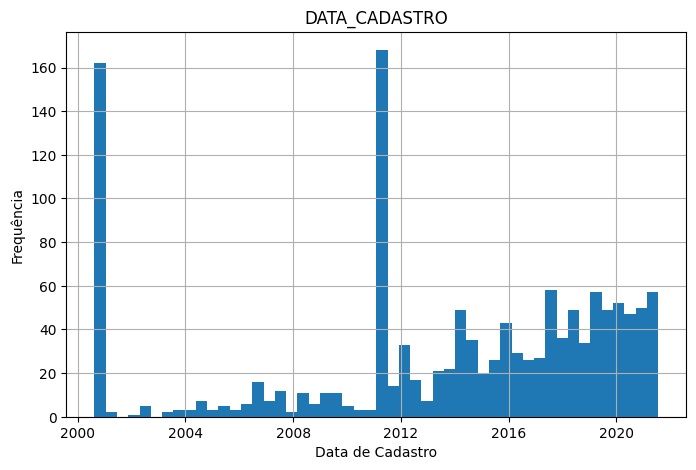

In [38]:
#Gera um histograma da distribuição dos dados
plt.figure(figsize=(8, 5))
df_1['DATA_CADASTRO'].hist(bins=50)
plt.title('DATA_CADASTRO')
plt.xlabel('Data de Cadastro')
plt.ylabel('Frequência')
plt.show()

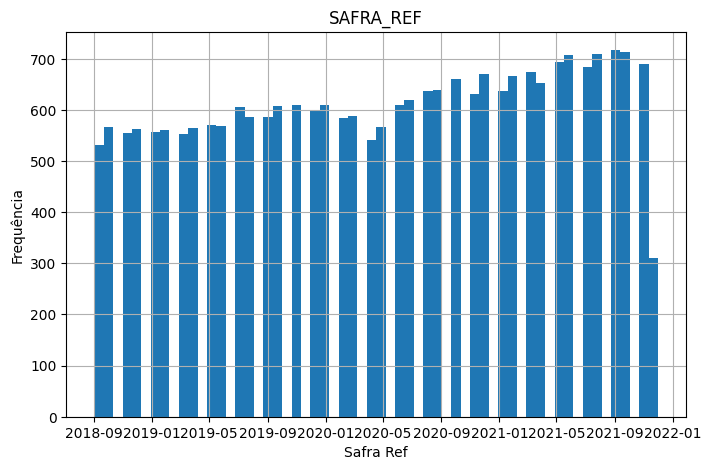

In [39]:
plt.figure(figsize=(8, 5))
df_2['SAFRA_REF'].hist(bins=60)
plt.title('SAFRA_REF')
plt.xlabel('Safra Ref')
plt.ylabel('Frequência')
plt.show()

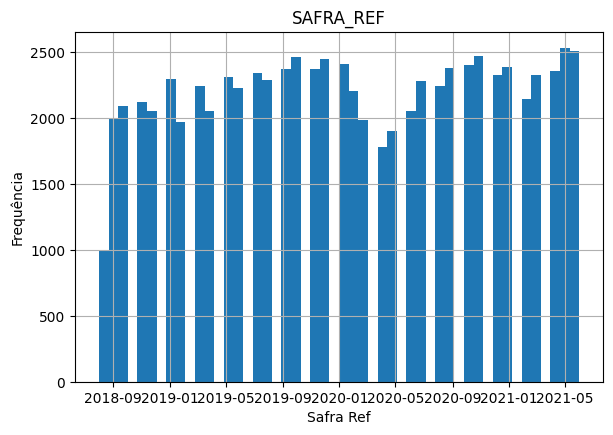

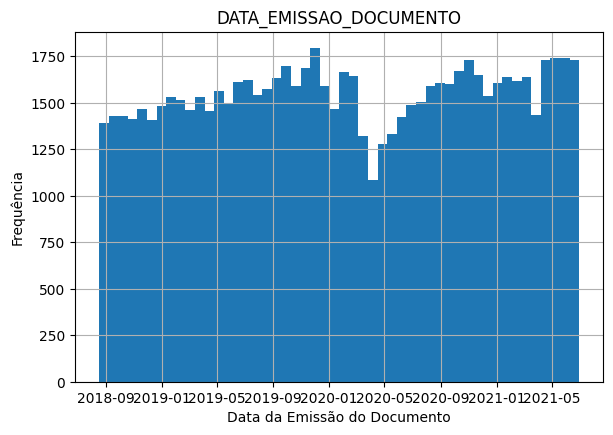

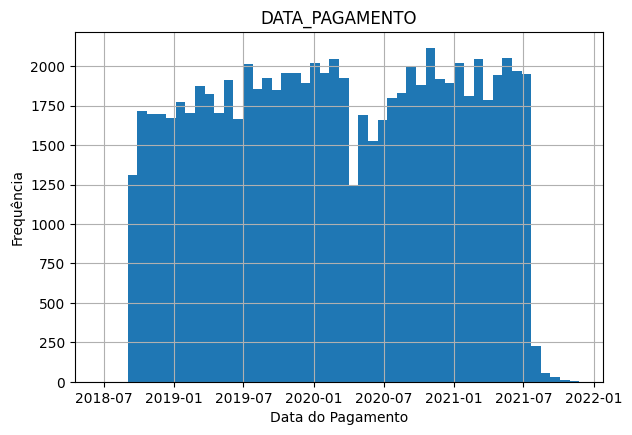

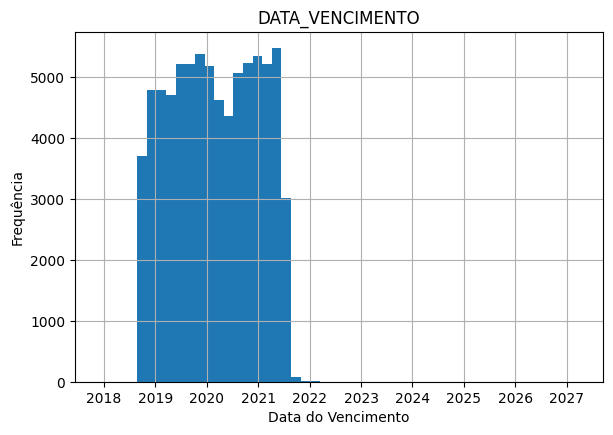

In [40]:
plt.figure(figsize=(15, 10))
plt.subplot (2, 2, 1)
df_3['SAFRA_REF'].hist(bins=50)
plt.title('SAFRA_REF')
plt.xlabel('Safra Ref')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot (2, 2, 1)
df_3['DATA_EMISSAO_DOCUMENTO'].hist(bins=50)
plt.title('DATA_EMISSAO_DOCUMENTO')
plt.xlabel('Data da Emissão do Documento')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot (2, 2, 1)
df_3['DATA_PAGAMENTO'].hist(bins=50)
plt.title('DATA_PAGAMENTO')
plt.xlabel('Data do Pagamento')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot (2, 2, 1)
df_3['DATA_VENCIMENTO'].hist(bins=50)
plt.title('DATA_VENCIMENTO')
plt.xlabel('Data do Vencimento')
plt.ylabel('Frequência')
plt.show()

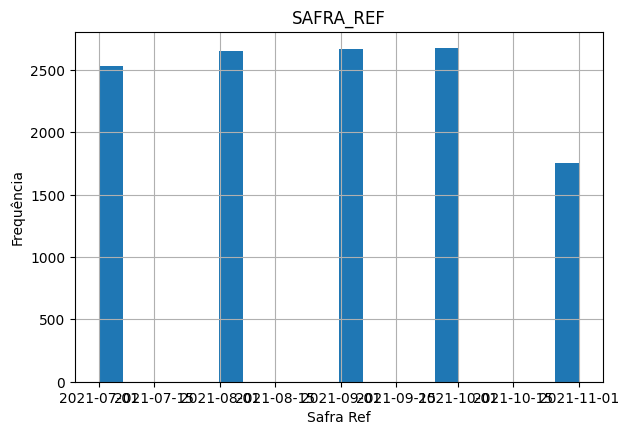

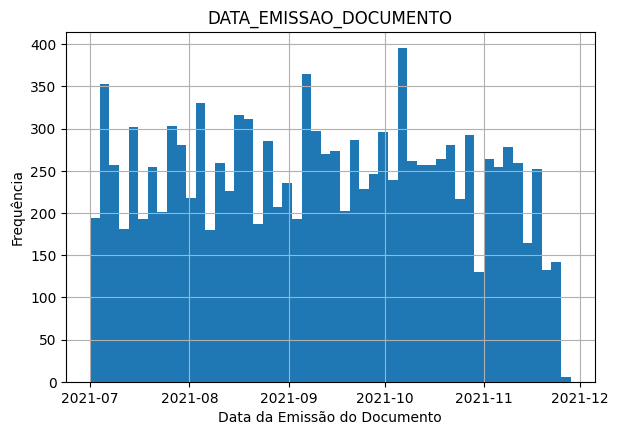

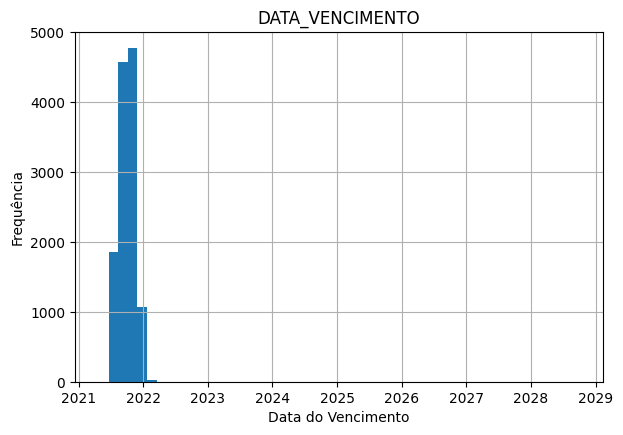

In [41]:
plt.figure(figsize=(15, 10))
plt.subplot (2, 2, 1)
df_4['SAFRA_REF'].hist(bins=20)
plt.title('SAFRA_REF')
plt.xlabel('Safra Ref')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot (2, 2, 1)
df_4['DATA_EMISSAO_DOCUMENTO'].hist(bins=50)
plt.title('DATA_EMISSAO_DOCUMENTO')
plt.xlabel('Data da Emissão do Documento')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot (2, 2, 1)
df_4['DATA_VENCIMENTO'].hist(bins=50)
plt.title('DATA_VENCIMENTO')
plt.xlabel('Data do Vencimento')
plt.ylabel('Frequência')
plt.show()

#### Conclusões da Análise


Notamos que os únicos valores de datas que possuem um comportamento atípico em comparação com as demais, são os da tabela `base_cadastral`, sendo a `'DATA_CADASTRO'`. Repare que existem picos em valores próximos dos anos de 2000 e 2012 respectivamente. 

Essas barras isoladas podem prejudicar o treinamento do modelo, em um caso ideal, é preciso conversar com quem forneceu os dados para ver se ouve algum evento nessas duas datas específicas que causou essa grande quantidade de cadasatros, de outro modo estes valores podem inserir um viés errado de que "*quem fez cadastro nos anos de 2000 e 2011 tem uma probabilidade mairo de ser inadimplente*", para  um melhor treinamento estes valores devem ser removidos.

In [42]:
#Confirmando o que apareceu no histograma
frequencia_datas = df_1['DATA_CADASTRO'].value_counts()
print(frequencia_datas)
frequencia_datas.describe()

DATA_CADASTRO
2000-08-15    162
2011-02-14    142
2017-08-06     18
2012-03-11     16
2011-02-15     12
             ... 
2021-04-14      1
2016-07-31      1
2016-08-14      1
2006-09-11      1
2012-05-29      1
Name: count, Length: 777, dtype: int64


count    777.000000
mean       1.692407
std        7.743761
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      162.000000
Name: count, dtype: float64

---
## 2. Tratamento dos Dados

O tratamento dos dados vai ocorrer nas seguintes etapas:

- Separação em Dados de Treinamento e Validação.
- Tratamento dos Valores Missing em Cada DataFrame.
- Tratamento de Outliers em Cada DataFrame.
- Codificando Variavel Target (alvo).
- Ajuste das Variáveis Para o Treinamento.
- Definindo Conjuntos de Treino e Teste para o Treinamento do Modelo.
- Preparando os Dados para Aplicar o Método MinMax.
- Ajustando a Escala dos Dados com MinMax.


### 2.1 Separação em Dados de Treinamento e Validação

Serão compilados os dados em duas tabelas separadas com os respectivos nomes de `df_treino` e `df_validacao`, sendo que ambas as tabelas vão ter o mesmo número de colunas. 

- O dataframe `df_treino` vai consistir nas informações dos clientes presentas na `base_pagamentos_desenvolvimento` com infromações adicionais de cada cliente e suas transações encontradas nas tabelas `base_cadastral` e `base_info`.
- Já o dataframe `df_validacao` vai conter os dados dos clientes `base_pagamentos_teste`, também com informações adicionais sobre estes clientes e suas trasanções presentes nos dataframes `base_cadastral` e `base_info`.

In [43]:
#Criando tabela dos dados de treino
df_treino = pd.merge(df_3, df_1)
df_treino = pd.merge(df_treino, df_2)
df_treino

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,324916756972236008,2018-09-01,2018-09-02,2018-09-19,2018-09-19,21499.85,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,203123.0,103.0
1,324916756972236008,2018-09-01,2018-09-03,2018-09-19,2018-09-19,17690.72,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,203123.0,103.0
2,324916756972236008,2018-09-01,2018-09-13,2018-10-01,2018-10-01,17240.90,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,203123.0,103.0
3,324916756972236008,2018-09-01,2018-09-14,2018-10-01,2018-10-01,21474.50,5.99,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62,203123.0,103.0
4,4679462479444735708,2018-09-01,2018-09-07,2018-09-24,2018-09-24,17354.30,8.99,2000-08-15,18,NaN,Indústria,HOTMAIL,GRANDE,19,53021.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73472,4530631557358349711,2021-06-01,2021-06-30,2021-07-16,2021-07-16,63971.51,5.99,2000-08-15,11,NaN,Serviços,HOTMAIL,PEQUENO,55,139142.0,116.0
73473,2951563549197799278,2021-06-01,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,2000-08-15,11,NaN,Comércio,AOL,PEQUENO,13,280343.0,161.0
73474,5220206408301580591,2021-06-01,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,2021-04-08,19,NaN,Indústria,GMAIL,GRANDE,25,235315.0,87.0
73475,5860276371789140450,2021-06-01,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,2011-02-15,91,NaN,Serviços,HOTMAIL,GRANDE,67,100006.0,NaN


In [44]:
#Criando tabela dos dados de validacao
df_validacao = pd.merge(df_4, df_1)
df_validacao = pd.merge(df_validacao, df_2)
df_validacao

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,5058298901476893676,2021-07-01,2021-07-14,2021-08-04,11204.75,4.99,2014-03-30,54,NaN,Serviços,GMAIL,MEDIO,99,467430.0,NaN
1,274692171162531764,2021-07-01,2021-07-08,2021-08-23,60718.50,5.99,2005-08-03,19,NaN,Serviços,GMAIL,PEQUENO,13,417192.0,104.0
2,274692171162531764,2021-07-01,2021-07-11,2021-08-25,60718.50,5.99,2005-08-03,19,NaN,Serviços,GMAIL,PEQUENO,13,417192.0,104.0
3,274692171162531764,2021-07-01,2021-07-16,2021-08-30,62250.00,5.99,2005-08-03,19,NaN,Serviços,GMAIL,PEQUENO,13,417192.0,104.0
4,465309249432033993,2021-07-01,2021-07-05,2021-07-30,26593.95,6.99,2014-07-23,69,NaN,Comércio,GMAIL,GRANDE,76,873938.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,3682570285558758138,2021-11-01,2021-11-24,2021-12-10,30867.50,4.99,2018-03-21,94,NaN,Serviços,GMAIL,GRANDE,68,197777.0,144.0
11826,3095686599956852697,2021-11-01,2021-11-24,2021-12-13,68024.05,6.99,2015-12-08,41,NaN,Comércio,BOL,MEDIO,83,165390.0,166.0
11827,4993499380140734678,2021-11-01,2021-11-25,2021-12-13,122875.35,8.99,2015-11-24,31,NaN,Serviços,GMAIL,PEQUENO,37,311422.0,150.0
11828,1299146298565441811,2021-11-01,2021-11-26,2021-12-13,143791.85,5.99,2000-08-15,21,NaN,Serviços,HOTMAIL,MEDIO,21,220341.0,122.0


### 2.2. Tratamento dos Valores Missing em Cada DataFrame

#### Tratando Missing Values das Variáveis Numéricas

#### Pressuposições

Neste projeto vamos assumir que os valores missing são nulos ao acaso, isto é, seguem, o regime *missing completely at random (MCAR)*. Como existem outliers em alguns conjuntos de dados, será escolhido o método *median inputation*, que substitui os valoes ausentes pela mediana dos valores não nulos.

In [45]:
#checando os tipos de dados em df_treino
df_treino.dtypes

ID_CLIENTE                         int64
SAFRA_REF                 datetime64[ns]
DATA_EMISSAO_DOCUMENTO    datetime64[ns]
DATA_PAGAMENTO            datetime64[ns]
DATA_VENCIMENTO           datetime64[ns]
VALOR_A_PAGAR                    float64
TAXA                             float64
DATA_CADASTRO             datetime64[ns]
DDD                               object
FLAG_PF                           object
SEGMENTO_INDUSTRIAL               object
DOMINIO_EMAIL                     object
PORTE                             object
CEP_2_DIG                         object
RENDA_MES_ANTERIOR               float64
NO_FUNCIONARIOS                  float64
dtype: object

In [46]:
#verificando a quantidade de missing values nas variáveis numéricas em df_treino
numerica  = [var for var in df_treino.columns if df_treino[var].dtypes != 'O']
numeros = df_treino[numerica].isnull().sum()
numeros

ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1110
TAXA                         0
DATA_CADASTRO                0
RENDA_MES_ANTERIOR        2195
NO_FUNCIONARIOS           3650
dtype: int64

In [47]:
#seleciona apenas as variaveis com missing values
numerica_vazios = pd.DataFrame(index=range(0,1))
numerica_vazios['VALOR_A_PAGAR'] = numeros['VALOR_A_PAGAR']
numerica_vazios['RENDA_MES_ANTERIOR'] = numeros['RENDA_MES_ANTERIOR']
numerica_vazios['NO_FUNCIONARIOS'] = numeros['NO_FUNCIONARIOS']
numerica_vazios

,VALOR_A_PAGAR,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1110,2195,3650


In [48]:
#imputa valores aos missing values de df_treino e df_validacao com base na mediana das colunas correspondentes em df_treino
for var in [df_treino, df_validacao]:
  for col in numerica_vazios:
    col_mediana = df_treino[col].median()
    var[col].fillna(col_mediana, inplace = True)

C:\Users\D0ugl\AppData\Local\Temp\ipykernel_1728\1623909421.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var[col].fillna(col_mediana, inplace = True)
C:\Users\D0ugl\AppData\Local\Temp\ipykernel_1728\1623909421.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [49]:
#verificando novamente a quantidade de missing values nas variáveis numéricas em df_treino
numerica  = [var for var in df_treino.columns if df_treino[var].dtypes != 'O']
df_treino[numerica].isnull().sum()

ID_CLIENTE                0
SAFRA_REF                 0
DATA_EMISSAO_DOCUMENTO    0
DATA_PAGAMENTO            0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
DATA_CADASTRO             0
RENDA_MES_ANTERIOR        0
NO_FUNCIONARIOS           0
dtype: int64

In [50]:
#verificando a quantidade de missing values nas variáveis numéricas em df_teste
numerica  = [var for var in df_validacao.columns if df_validacao[var].dtypes != 'O']
df_validacao[numerica].isnull().sum()

ID_CLIENTE                0
SAFRA_REF                 0
DATA_EMISSAO_DOCUMENTO    0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
DATA_CADASTRO             0
RENDA_MES_ANTERIOR        0
NO_FUNCIONARIOS           0
dtype: int64

#### Tratando Missing Values das Variáveis Categóricas

In [51]:
#mostra a porcentagem de missing values de cada variável categórica e
categorica = [var for var in df_treino.columns if df_treino[var].dtypes == 'O']

categorica
df_treino[categorica].isnull().mean()

DDD                    0.093948
FLAG_PF                0.997877
SEGMENTO_INDUSTRIAL    0.017611
DOMINIO_EMAIL          0.011174
PORTE                  0.032187
CEP_2_DIG              0.000000
dtype: float64

In [52]:
#retorna variaveis categóricas com missing values
for col in categorica:
  if df_treino[col].isnull().mean() > 0:
    print(col, (df_treino[col].isnull().mean()))

DDD 0.0939477659675817
FLAG_PF 0.9978768866448005
SEGMENTO_INDUSTRIAL 0.01761095308736067
DOMINIO_EMAIL 0.011173564516787566
PORTE 0.032186942852865524


In [53]:
#imputa valores aos missing values das variaveis categóricas, com base nos valores mais frequentes nas respectivas colunas em df_teste
for var2 in [df_treino, df_validacao]:
  var2['DDD'].fillna(df_treino['DDD'].mode()[0], inplace = True)
  var2['FLAG_PF'].fillna(df_treino['FLAG_PF'].mode()[0], inplace = True)
  var2['SEGMENTO_INDUSTRIAL'].fillna(df_treino['SEGMENTO_INDUSTRIAL'].mode()[0], inplace = True)
  var2['DOMINIO_EMAIL'].fillna(df_treino['DOMINIO_EMAIL'].mode()[0], inplace = True)
  var2['PORTE'].fillna(df_treino['PORTE'].mode()[0], inplace = True)

C:\Users\D0ugl\AppData\Local\Temp\ipykernel_1728\3395814357.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var2['DDD'].fillna(df_treino['DDD'].mode()[0], inplace = True)
C:\Users\D0ugl\AppData\Local\Temp\ipykernel_1728\3395814357.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [54]:
#verifica se os valores missing das variáveis categóricas foram tartados em df_treino
df_treino[categorica].isnull().sum()

DDD                    0
FLAG_PF                0
SEGMENTO_INDUSTRIAL    0
DOMINIO_EMAIL          0
PORTE                  0
CEP_2_DIG              0
dtype: int64

In [55]:
#verifica se os valores missing das variáveis categóricas foram tartados em df_teste
df_validacao[categorica].isnull().sum()

DDD                    0
FLAG_PF                0
SEGMENTO_INDUSTRIAL    0
DOMINIO_EMAIL          0
PORTE                  0
CEP_2_DIG              0
dtype: int64

In [56]:
#verifica se todos os valores missing foram tartados em df_treino
df_treino.isnull().sum()

ID_CLIENTE                0
SAFRA_REF                 0
DATA_EMISSAO_DOCUMENTO    0
DATA_PAGAMENTO            0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
DATA_CADASTRO             0
DDD                       0
FLAG_PF                   0
SEGMENTO_INDUSTRIAL       0
DOMINIO_EMAIL             0
PORTE                     0
CEP_2_DIG                 0
RENDA_MES_ANTERIOR        0
NO_FUNCIONARIOS           0
dtype: int64

In [57]:
#verifica se todos os valores missing foram tartados em df_teste
df_validacao.isnull().sum()

ID_CLIENTE                0
SAFRA_REF                 0
DATA_EMISSAO_DOCUMENTO    0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
DATA_CADASTRO             0
DDD                       0
FLAG_PF                   0
SEGMENTO_INDUSTRIAL       0
DOMINIO_EMAIL             0
PORTE                     0
CEP_2_DIG                 0
RENDA_MES_ANTERIOR        0
NO_FUNCIONARIOS           0
dtype: int64

### 2.3. Tratamento de Outliers em Cada DataFrame

Como visto na seção de análise de dados, a única variavel numérica com outliers é a `DATA_CADASTRO`.

In [58]:
#define uma tabela com a frequãncia em que cada data aparece
frequencia_datas_2 = df_treino['DATA_CADASTRO'].value_counts().reset_index()
frequencia_datas_2.columns = ['DATA_CADASTRO', 'FREQUENCIAS']
frequencia_datas_2

,DATA_CADASTRO,FREQUENCIAS
0,2000-08-15,17455
1,2011-02-14,14242
2,2011-02-15,1616
3,2012-03-11,1236
4,2014-02-02,1205
...,...,...
684,2009-12-28,1
685,2021-01-19,1
686,2019-12-02,1
687,2019-12-30,1


In [59]:
#utiliza o método estatístico dos quartis para definir quais datas possuem frequências consideradas outliers
IQR = frequencia_datas_2.FREQUENCIAS.quantile(0.75) - frequencia_datas_2.FREQUENCIAS.quantile(0.25)
lim_inferior = frequencia_datas_2.FREQUENCIAS.quantile(0.25) - (IQR * 3)
lim_superior = frequencia_datas_2.FREQUENCIAS.quantile(0.75) + (IQR * 3)
print('Os outliers são as datas com frequência MENOR que {liminferior} e MAIOR que {limsuperior}'
.format(liminferior=lim_inferior, limsuperior=lim_superior))

Os outliers são as datas com frequência MENOR que -212.0 e MAIOR que 292.0


In [60]:
#cria tabela com tadas as datas consideradas com frequências outliers
datas_alta_frequencia = frequencia_datas_2[frequencia_datas_2['FREQUENCIAS'] >= 292]['DATA_CADASTRO'].tolist()
print('As datas com alta frequência a serem removidas:')
datas_alta_frequencia

As datas com alta frequência a serem removidas:


[Timestamp('2000-08-15 00:00:00'),
 Timestamp('2011-02-14 00:00:00'),
 Timestamp('2011-02-15 00:00:00'),
 Timestamp('2012-03-11 00:00:00'),
 Timestamp('2014-02-02 00:00:00'),
 Timestamp('2015-12-29 00:00:00'),
 Timestamp('2014-03-02 00:00:00'),
 Timestamp('2017-08-06 00:00:00'),
 Timestamp('2008-09-11 00:00:00'),
 Timestamp('2014-01-13 00:00:00'),
 Timestamp('2014-08-14 00:00:00'),
 Timestamp('2013-10-31 00:00:00'),
 Timestamp('2009-04-01 00:00:00'),
 Timestamp('2011-05-16 00:00:00'),
 Timestamp('2015-08-16 00:00:00'),
 Timestamp('2009-03-30 00:00:00'),
 Timestamp('2007-03-19 00:00:00'),
 Timestamp('2016-11-29 00:00:00'),
 Timestamp('2007-10-17 00:00:00'),
 Timestamp('2017-09-20 00:00:00'),
 Timestamp('2012-10-01 00:00:00')]

In [61]:
#exclui dos conjuntos de dados todas as datas com valores considerados outliers
df_validacao_2 = df_validacao[~df_validacao['DATA_CADASTRO'].isin(datas_alta_frequencia)]
df_treino_2 = df_treino[~df_treino['DATA_CADASTRO'].isin(datas_alta_frequencia)]

Vamnos comparar as frequancias antes e depois da realização do tratramento.

In [62]:
df_treino['DATA_CADASTRO'].value_counts().max(), df_validacao['DATA_CADASTRO'].value_counts().max()

(np.int64(17455), np.int64(2480))

In [63]:
df_treino_2['DATA_CADASTRO'].value_counts().max(), df_validacao_2['DATA_CADASTRO'].value_counts().max()

(np.int64(281), np.int64(67))

### 2.4. Codificando Variavel Target (alvo)

Será criado uma coluna no conjunto de dados de treino com o nome de `INADIMPLENTES`, contendo `0` para os pagementos realiados com uma diferença **menor** que 5 dias entre a `DATA_PAGAMENTO` e a `DATA_VENCIMENTO`, e `1` para pagementos com uma diferença **maior ou igual** a 5 dias.

In [ ]:
#Definir quais pagamentos possuem uma diferença entre DATA_PAGAMENTO e DATA_VENCIMENTO maior que 5 dias
df_treino_2['INADIMPLENTES'] = np.where(((df_treino_2['DATA_PAGAMENTO'] - df_treino_2['DATA_VENCIMENTO']).dt.days) < 5, 0, 1)
df_treino_2.loc[:, 'INADIMPLENTES'] = df_treino_2.loc[:, 'INADIMPLENTES'].astype('object')

C:\Users\D0ugl\AppData\Local\Temp\ipykernel_1728\693875081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treino_2['INADIMPLENTES'] = np.where(((df_treino_2['DATA_PAGAMENTO'] - df_treino_2['DATA_VENCIMENTO']).dt.days) < 5, 0, 1)
C:\Users\D0ugl\AppData\Local\Temp\ipykernel_1728\693875081.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_treino_2.loc[:, 'INADIMPLENTES'] = df_treino_2.loc[:, 'INADIMPLENTES'].astype('object')


In [65]:
#Verificando que as mudanças foram feitas
df_treino_2.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,INADIMPLENTES
27,2250817603281429928,2018-09-01,2018-09-06,2018-09-24,2018-09-24,97329.20,5.99,2001-05-31,51,X,Comércio,YAHOO,GRANDE,92,278795.0,99.0,0
28,2250817603281429928,2018-09-01,2018-09-14,2018-10-01,2018-10-01,81472.00,5.99,2001-05-31,51,X,Comércio,YAHOO,GRANDE,92,278795.0,99.0,0
29,5301988619224057921,2018-09-01,2018-09-10,2018-09-26,2018-09-26,56152.28,6.99,2016-02-24,67,X,Indústria,GMAIL,MEDIO,79,209440.0,107.0,0
34,2092588065958607289,2018-09-01,2018-09-11,2018-09-28,2018-09-28,17639.60,5.99,2006-07-18,62,X,Comércio,YAHOO,GRANDE,76,281719.0,128.0,0
35,2092588065958607289,2018-09-01,2018-09-14,2018-10-01,2018-10-01,22176.20,5.99,2006-07-18,62,X,Comércio,YAHOO,GRANDE,76,281719.0,128.0,0


Podemos também realizar uma contagem de quantos valores foram considerados inadimplentes, isto é, com mais de 5 dias de atraso no pagamento.

In [66]:
contagem = df_treino_2['INADIMPLENTES'].value_counts()
contagem

INADIMPLENTES
0    26807
1     2697
Name: count, dtype: int64

### 2.5. Ajuste das Variáveis Para o Treinamento

Será realizado agora uma tartamento nas colunas dos dados para o treinamento e teste do modelo, sendo que algumas colunas serão excluidas, já outras vão ser utilizadas para o cálculo de novos parâmetros, sendo que será utlizda a seguinte classsificação no tratamento:

- **Variaveis categóricas:** Estas serão convertidas em valores numéricaso com legendas das categorias correspondentes.
- **Variaveis numéricas:** Vão ser depois redimensionadas assim como as categóricas no prosso passo do processamento dos dados.
- **Variaveis exclusão:** Serão excluidas para não inserir viéses ou atrapalahar no treinamento do modelo.


#### Variáveis e Seus Tratamentos

* `ID_CLIENTE` (exclusão): Devere ser exluido pois não possuem poder preditivo, e podem causar o overfitting, pois o modelo pode "decorar" o Id daquele cliente, introduzindo um viés no treinamento.
  
* `SAFRA_REF` (categórica): Vai ser classificada como variável categórica, sendoq ue será levado em conta apenas o mês da data, para assim verificarmos se existe algum padrão de sazionalidade entre os clientes inadimplentes.
  
* `PRAZO_DE_CREDITO` (numérica): Será criada pela diferença entre a DATA_DE_EMISSAO_DOCUMENTO e a DATA_VENCIMENTO, represnetando assim o periodo (em dias) que o devedor tem para quitar a divida dele, podendo ter assim alguma relaão com a inadimplencia.
  
* `VALOR_A_PAGAR` (numérica)
  
* `TAXA` (numérica)
  
* `TEMPO_COMO_CLIENTE` (numérica): Será calculada a partir da coluna DATA_CADASTRO e a SAFRA_REF, sendo esta a a quantidade de anos que aquela cliente está cadatrado no sitema até o dia que a amostra foi coletada, medindo assim "o quaão antigo é aquele cliente".
  
* `DDD` (categórica): Será visto como categórica, pois carrega informações de cada cliente, separando este sassim em categorias de região.
  
* `FLAG_PF` (categórica)
  
* `SEGMENTO_INDUSTRIAL` (categórica)
  
* `DOMINIO_EMAIL` (categórica)
  
* `PORTE` (categórica)
  
* `CEP_2_DIG` (categórica): Pelos mesmos motivos do DDD
  
* `RENDA_MES_ANTERIOR` (numérica)
  
* `NO_FUNCIONARIOS` (numérica)

#### Ajustano os Tipos das Variáveis dos Dados

In [67]:
#Tratando dos dados de treinamento

df_treino_3 = df_treino_2.copy()

#usa DATA_VENCIMENTO e DATA_EMISSAO_DOCUMENTO para o calculo de PRAZO_DE_CREDITO em dias
df_treino_3.loc[:, 'PRAZO_DE_CREDITO'] = (df_treino_2.loc[:, 'DATA_VENCIMENTO'] - df_treino_2.loc[:, 'DATA_EMISSAO_DOCUMENTO']).dt.days

#usa SAFRA_REF e DATA_CADASTRO para calcular TEMPO_COMO_CLIENTE em dias
df_treino_3.loc[:, 'TEMPO_COMO_CLIENTE'] = (df_treino_2.loc[:, 'SAFRA_REF'] - df_treino_2.loc[:, 'DATA_CADASTRO']).dt.days

#extrai os meses da safra de referencia
df_treino_3.loc[:, 'MES_SAFRA_REF'] = df_treino_3.loc[:, 'SAFRA_REF'].dt.month.astype('object')

#exclui colunas desnecessárias
df_treino_3 = df_treino_3.drop(columns = ['ID_CLIENTE','SAFRA_REF', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO', 'DATA_EMISSAO_DOCUMENTO', 'DATA_CADASTRO'])

In [68]:
#Tratando dos dados de validacao

df_validacao_3 = df_validacao_2.copy()

#usa DATA_VENCIMENTO e DATA_EMISSAO_DOCUMENTO para o calculo de PRAZO_DE_CREDITO em dias
df_validacao_3.loc[:, 'PRAZO_DE_CREDITO'] = (df_validacao_2.loc[:, 'DATA_VENCIMENTO'] - df_validacao_2.loc[:, 'DATA_EMISSAO_DOCUMENTO']).dt.days

#usa SAFRA_REF e DATA_CADASTRO para calcular TEMPO_COMO_CLIENTE em dias
df_validacao_3.loc[:, 'TEMPO_COMO_CLIENTE'] = (df_validacao_2.loc[:, 'SAFRA_REF'] - df_validacao_2.loc[:, 'DATA_CADASTRO']).dt.days

#extrai os meses da safra de referencia
df_validacao_3.loc[:, 'MES_SAFRA_REF'] = df_validacao_3.loc[:, 'SAFRA_REF'].dt.month.astype('object')

#exclui colunas desnecessárias
df_validacao_3 = df_validacao_3.drop(columns = ['ID_CLIENTE','SAFRA_REF', 'DATA_VENCIMENTO', 'DATA_EMISSAO_DOCUMENTO', 'DATA_CADASTRO'])

In [69]:
#verificando mudanças feitas
df_treino_3.columns, df_validacao_3.columns

(Index(['VALOR_A_PAGAR', 'TAXA', 'DDD', 'FLAG_PF', 'SEGMENTO_INDUSTRIAL',
        'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG', 'RENDA_MES_ANTERIOR',
        'NO_FUNCIONARIOS', 'INADIMPLENTES', 'PRAZO_DE_CREDITO',
        'TEMPO_COMO_CLIENTE', 'MES_SAFRA_REF'],
       dtype='object'),
 Index(['VALOR_A_PAGAR', 'TAXA', 'DDD', 'FLAG_PF', 'SEGMENTO_INDUSTRIAL',
        'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG', 'RENDA_MES_ANTERIOR',
        'NO_FUNCIONARIOS', 'PRAZO_DE_CREDITO', 'TEMPO_COMO_CLIENTE',
        'MES_SAFRA_REF'],
       dtype='object'))

### 2.6. Definindo Conjuntos de Treino e Teste para o Treinamento do Modelo

#### Tratando as Variáveis Para a Mudança de Escala

In [70]:
#separando as a variavel targed das demais
y_treinamento = pd.DataFrame()
X_treinamento = pd.DataFrame()

#conjunto de dados de validação
X_val = df_validacao_3.copy()

y_treinamento['INADIMPLENTES'] = df_treino_3['INADIMPLENTES']
X_treinamento = df_treino_3.drop('INADIMPLENTES', axis=1)

In [71]:
#separando os dados para o treinamento e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_treinamento, y_treinamento, test_size = 0.20, random_state = 0)

In [72]:
#verificando as dimensões de cada conjunto de dados
X_train.shape, X_test.shape, X_val.shape

((23603, 13), (5901, 13), (5304, 13))

### 2.7. Preparando os Dados para Aplicar o Método MinMax

Agora vamos aplicar o comando `dummies` do pandas para realizarmos o tratamento ds variáveis categóricas para o treinamento do modelo.
Temos que mesmo que ambos os DataFrames tenham 13 colunas inicialmente, se essas 13 colunas contiverem variáveis categóricas, e as categorias dentro delas não forem idênticas entre treino e teste, o número de colunas após o `get_dummies` será diferente. 

Como precisamos de o mesmo número de colunas nos data frames resultanets, vamos solucionar isso combinando temporariamente os data frames `X_train`, `X_teste` e `X_val` mas é preservando os indices com `ignore_index=False`, para depois podermos separalos novamente "*sem misturar os dados de treino, teste e validação*".

In [73]:
#Indexando cada conjunto de forma única
index_1 = list(range(0, X_train.shape[0]))
index_2 = list(range(X_train.shape[0], X_train.shape[0] + X_test.shape[0]))
index_3 = list(range(X_train.shape[0] + X_test.shape[0], X_train.shape[0] + X_test.shape[0] + X_val.shape[0]))

X_train.index = index_1
X_test.index = index_2
X_val.index = index_3

In [74]:
#criando conjunto temporario
X_combinado = pd.concat([X_train, X_test, X_val], ignore_index=False)

In [75]:
#verificando as variáveis categóricas conjunto de treino
var_categoricas = [var for var in X_combinado.columns if X_combinado[var].dtype == 'O' ]
X_combinado[var_categoricas].head()

,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,MES_SAFRA_REF
0,21,X,Indústria,YAHOO,GRANDE,23,3
1,11,X,Serviços,YAHOO,MEDIO,57,1
2,41,X,Comércio,GMAIL,MEDIO,80,1
3,32,X,Comércio,YAHOO,MEDIO,36,12
4,53,X,Comércio,GMAIL,GRANDE,96,6


Aplicando o método `get_dummies`

In [76]:
#variáveis numéricas conjunto X_combinado
var_numericas = [var for var in X_combinado.columns if X_combinado[var].dtype != 'O' ]

In [77]:
X_combinado = pd.concat([X_combinado[var_numericas].astype(int),
                        pd.get_dummies(X_combinado.DDD).astype(int),
                        pd.get_dummies(X_combinado.FLAG_PF).astype(int),
                        pd.get_dummies(X_combinado.SEGMENTO_INDUSTRIAL).astype(int),
                        pd.get_dummies(X_combinado.DOMINIO_EMAIL).astype(int),
                        pd.get_dummies(X_combinado.PORTE).astype(int),
                        pd.get_dummies(X_combinado.CEP_2_DIG).astype(int),
                        pd.get_dummies(X_combinado.MES_SAFRA_REF).astype(int)], axis = 1)

In [78]:
#separando novamente nos respectivos conjuntos de treino, teste e validação
X_train =  X_combinado.loc[X_train.index]
X_test =  X_combinado.loc[X_test.index]
X_val =  X_combinado.loc[X_val.index]

### 2.8. Ajustando a Escala dos Dados com MinMax


Para um melhor modelo, vamos ajustar as escalas dos dados, pois dados com valores numéricos maiores podem de forma errônea inserir viézes no treinamento.

In [79]:
#verificando escala autual dos dados
X_train.describe()

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PRAZO_DE_CREDITO,TEMPO_COMO_CLIENTE,(1,(2,(3,(4,...,3,4,5,6,7,8,9,10,11,12
count,2.360300e+04,23603.000000,2.360300e+04,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,...,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000
mean,4.352095e+04,5.826886,2.862673e+05,117.584587,24.012541,2193.008346,0.002203,0.004533,0.000466,0.000466,...,0.086345,0.081685,0.091471,0.091641,0.059399,0.060416,0.085371,0.091726,0.090921,0.087574
std,4.972766e+04,1.817897,2.116259e+05,20.001144,26.969669,1588.594875,0.046887,0.067179,0.021583,0.021583,...,0.280879,0.273889,0.288284,0.288524,0.236375,0.238261,0.279438,0.288644,0.287502,0.282680
min,0.000000e+00,4.000000,1.050000e+02,0.000000,-420.000000,-23.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.782400e+04,5.000000,1.327480e+05,106.000000,16.000000,923.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.282300e+04,5.000000,2.405020e+05,118.000000,18.000000,1865.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.540500e+04,6.000000,3.844600e+05,129.000000,25.000000,3041.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.400000e+06,11.000000,1.622248e+06,198.000000,2107.000000,7422.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
X_test.describe()

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PRAZO_DE_CREDITO,TEMPO_COMO_CLIENTE,(1,(2,(3,(4,...,3,4,5,6,7,8,9,10,11,12
count,5901.000000,5901.000000,5.901000e+03,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,...,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000
mean,43654.596509,5.805118,2.866230e+05,117.723606,24.208270,2161.272327,0.001525,0.006101,0.000508,0.000847,...,0.088968,0.077275,0.090493,0.097950,0.063718,0.056262,0.084731,0.084731,0.091002,0.092357
std,39119.486619,1.796130,2.154922e+05,20.012963,19.291445,1604.361477,0.039027,0.077875,0.022544,0.029099,...,0.284722,0.267050,0.286911,0.297272,0.244271,0.230446,0.278505,0.278505,0.287636,0.289554
min,6.000000,4.000000,1.050000e+02,0.000000,-256.000000,-21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17766.000000,5.000000,1.298820e+05,106.000000,16.000000,874.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32902.000000,5.000000,2.405020e+05,118.000000,19.000000,1811.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56463.000000,6.000000,3.786360e+05,129.000000,25.000000,3019.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,280679.000000,11.000000,1.622248e+06,185.000000,640.000000,7422.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
#mudando os tipos de nomes das colunas para strings para aplicar o MinMax
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

#selecionando os nomes atuais das colunas para depois aplicar no data frame com
cols_1 = X_train.columns
cols_2 = X_test.columns

In [82]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

#aplicando MinMax
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#convertendo novamente para um conjunto de dados
X_train = pd.DataFrame(X_train, columns = cols_1)
X_test = pd.DataFrame(X_test, columns = cols_2)

In [83]:
#verificando mudanças feitas nos dados de treino
X_train.describe()

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PRAZO_DE_CREDITO,TEMPO_COMO_CLIENTE,(1,(2,(3,(4,...,3,4,5,6,7,8,9,10,11,12
count,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,...,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000,23603.000000
mean,0.009891,0.260984,0.176410,0.593862,0.175707,0.297651,0.002203,0.004533,0.000466,0.000466,...,0.086345,0.081685,0.091471,0.091641,0.059399,0.060416,0.085371,0.091726,0.090921,0.087574
std,0.011302,0.259700,0.130461,0.101016,0.010673,0.213377,0.046887,0.067179,0.021583,0.021583,...,0.280879,0.273889,0.288284,0.288524,0.236375,0.238261,0.279438,0.288644,0.287502,0.282680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004051,0.142857,0.081770,0.535354,0.172537,0.127065,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.007460,0.142857,0.148197,0.595960,0.173328,0.253593,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.012592,0.285714,0.236943,0.651515,0.176098,0.411551,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
#verificando mudanças feitas nos dados de teste
X_test.describe()

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PRAZO_DE_CREDITO,TEMPO_COMO_CLIENTE,(1,(2,(3,(4,...,3,4,5,6,7,8,9,10,11,12
count,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,...,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000
mean,0.009921,0.257874,0.176629,0.594564,0.175785,0.293388,0.001525,0.006101,0.000508,0.000847,...,0.088968,0.077275,0.090493,0.097950,0.063718,0.056262,0.084731,0.084731,0.091002,0.092357
std,0.008891,0.256590,0.132844,0.101076,0.007634,0.215495,0.039027,0.077875,0.022544,0.029099,...,0.284722,0.267050,0.286911,0.297272,0.244271,0.230446,0.278505,0.278505,0.287636,0.289554
min,0.000001,0.000000,0.000000,0.000000,0.064899,0.000269,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004038,0.142857,0.080003,0.535354,0.172537,0.120484,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.007478,0.142857,0.148197,0.595960,0.173724,0.246340,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.012832,0.285714,0.233352,0.651515,0.176098,0.408596,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.063791,1.000000,1.000000,0.934343,0.419470,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
## 3. Treinando o Modelo

### 3.1. Treinadno o modelo

Feito todos os ajustes e tratamentos nos dados, podemos finalmente usar estes no treinamento do modelo de regrerção logistica. Essa parte será mais rápida que as etapas anteriores, pois o modelo já está implementado de forma nativa no `sklearn`.

In [85]:
#convertendo variaveis de y_train para o formato certo
y_train = y_train.astype(int)

In [86]:
#treinando o modelo
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

c:\Users\D0ugl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


### 3.2. Resultados Preditos Segundo os Dados de Teste

Podemos agorar retornar os resukltados preditos pelo modelo em forma de vetor.

In [87]:
y_preditos_teste = logreg.predict(X_test)
y_preditos_teste

array([0, 0, 0, ..., 0, 0, 0], shape=(5901,))

#### Aplicando o método **predict_proba**

Esse método é usado para calcular a probabilidade da variavel ser 0 (não inadimplente) ou 1 (inadimplente).

In [88]:
logreg.predict_proba(X_test)[:,0]

array([0.95760842, 0.97811882, 0.9918775 , ..., 0.85509786, 0.9165093 ,
       0.9729408 ], shape=(5901,))

In [89]:
logreg.predict_proba(X_test)[:,1]

array([0.04239158, 0.02188118, 0.0081225 , ..., 0.14490214, 0.0834907 ,
       0.0270592 ], shape=(5901,))

---
## 4. Avaliando o Modelo

### 4.1. Verificando a Acurácia do Modelo

 A acurácia do modelo mede com qual freqência o modelo acerta em suas previsões,ela é dada pela fórmula $Acuracia = \dfrac{VP + VN}{VP + FP + VN + FN}$, com:
- $VP$: Verdadeiros Positivos
- $VN$: Verdadeiros Negativos
- $FP$ Falsos Positivos
- $FN$ Falsos Negativos

In [90]:
#convertendo dados de teste para o formato certo
y_test = y_test.astype(int)

In [91]:
from sklearn.metrics import accuracy_score

print('Score de acurácia do modelo: {0:0.4f}'. format(accuracy_score(y_test, y_preditos_teste)))

Score de acurácia do modelo: 0.9198


### 4.2. Comparando a Acurácia com o Conjunto de Teste e de Treino

In [92]:
y_preditos_treino = logreg.predict(X_train)
y_preditos_treino

array([0, 0, 0, ..., 0, 0, 0], shape=(23603,))

In [93]:
print('Score de acurácia com o conjunto de treino: {0:0.4f}'. format(accuracy_score(y_train, y_preditos_treino)))

Score de acurácia com o conjunto de treino: 0.9206


### 4.3. Checando Overfitting e Underfitting

- **Overfitting:** Ocorre quando um modelo aprende os dados de treinamento muito bem, a ponto de memorizar os padrões específicos que são únicos ao conjunto de treinamento e não representam a verdadeira relação nos dados, com isso o modelo generaliza de forma ruim fora dos dados de treinamento.

- **Underfitting:**  Nesse caso o modelo de é muito simples ou não foi treinado o suficiente para capturar a relação fundamental entre as features (entradas) e a variável alvo (saída) nos dados de treinamento. Ele vai mal tanto nos dados da anmostra quanto fora deles.

In [94]:
#retorna os scores para os conjuntos de treino e teste respectivamente

print('Score para o conjunto de treino: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Score para o conjunto de teste: {:.4f}'.format(logreg.score(X_test, y_test)))

Score para o conjunto de treino: 0.9206
Score para o conjunto de teste: 0.9198


Note que os valores referentes ao conjunto de treino são de 0.9206 de acurácia, enquanto os de teste são de 0.9198 de acrurácia, sendo valores bem próximo, portanto **não temos um caso de Overfitting**.

### 4.4. Comparando a Acurácia do Modelo com a Acurácia Nula

O modelo de acurácia nula representa a acurácia que um modelo "burro" ou "ingênuo", istop é, é acurácia de um modelo se ele sempre previsse a classe mais frequente no seu conjunto de dados de treino. Ele é dado pela fórmula abaixo:

In [95]:
acuracia_nula = (5367/ (5367 + 534))
print('Score de acurácia nula: {0:0.4f}'. format(acuracia_nula))

Score de acurácia nula: 0.9095


Isso é um bom sinal, nosso modelo possui uma acurácia maior que o modelo de acurácia nula, isso mostra que ele não apenas prevê os valores maias frequentes nos dados

### 4.5. Matriz de Confusão

A matriz de confusão é util para detalhar os tipos de erros, a acurácia nos diz apenas a porcentagem de previsões corretas. A matriz de confusão, por outro lado, nos mostra especificamente quais tipos de erros o modelo está cometendo.

In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preditos_teste)

print('Matriz de Confusão\n\n', cm)

print('\nVerdadeiros Positivos(VP) = ', cm[0,0])

print('\nVerdadeiros Negativos(VN) = ', cm[1,1])

print('\nFalsos Positivos(FP) = ', cm[0,1])

print('\nFalsos Negativos(FN) = ', cm[1,0])

Matriz de Confusão

 [[5325   42]
 [ 431  103]]

Verdadeiros Positivos(VP) =  5325

Verdadeiros Negativos(VN) =  103

Falsos Positivos(FP) =  42

Falsos Negativos(FN) =  431


<Axes: >

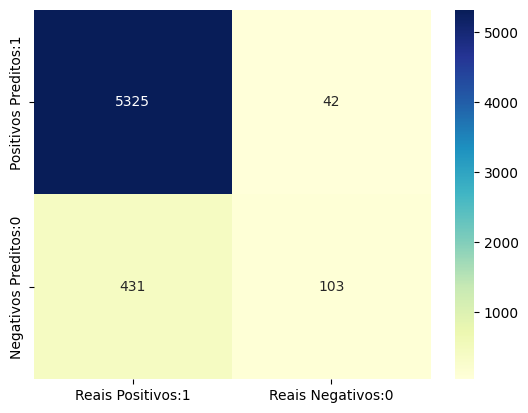

In [97]:
cm_matrix = pd.DataFrame(data=cm, columns=['Reais Positivos:1', 'Reais Negativos:0'],
                                 index=['Positivos Preditos:1', 'Negativos Preditos:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

A matriz de conduão nos mostrou que temos $5325 + 103  = 5428$ acertos e $431 + 42 = 473$ erros de predição com nosso modelo.



### 4.6. Métricas de Classificação

#### Tipos de Métricas

- **Precisão:** Mede a proporção das observações classificadas corretamente como positivas para com todas as observações, é dada por: $Precisão = \dfrac{VP}{VP + FP}$

- **Recall:** Mede a proporção entre as observações classsificadas corretamente como positivas para com as observações realmente positivas, sendo dada por: $Precisão = \dfrac{VP}{VP + FN}$

- **f1 Score:** É a média harmônica entre a precisão e o recall. Por ser a média harmônican ela é sensivel a peuqenas alterações na precisão e no recall, fora o fato dela considerar tanto falsos negativos e falsos positivos. Ela é dada por: $2 \times \dfrac{Precisão \times Recall}{Precisã + Recall}$

- **Support:** Não é uma métrica em si, mas no dá a quantidade de vezes que cada calsse (positivo ou negativo) ocorre.

#### Classification Report
É uma outra maneira de avaliar o modelo de classificação, o comando `classification_report` do `sklearn` nos retorna a **precisão**, **recall**, **f1** e o **support**.


In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preditos_teste))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5367
           1       0.71      0.19      0.30       534

    accuracy                           0.92      5901
   macro avg       0.82      0.59      0.63      5901
weighted avg       0.91      0.92      0.90      5901



Esses resultados serão melhor explorados na seção de conclusão.

#### Area sobre a curva ROC (Receiver Operating Characteristic)

A area sobre a curva ROC nos diz o quão eficiente é nosso modelo de classificação, em comparação com o modelo nuulo (classifica cada valor de modo aleatório em positivo e negativo). Uma mnodelo ideal (que sempre acerta) tem area sobre a curva ROC iguala $1$, sá o modelo nulom tem area igial a $0,5$. \\
Vamos avalaiar nosso modelo com essa métrica.

In [99]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_preditos_teste)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5925


Isso não é um bom indicador, apesar de ser maior que o modelo nulo, nosso modelo não possui um poder de predição tão mais eficiente que este, o que ficou evidente também peolo seu baixo recall. \\
Será preciso assim aplicar alguns métodos para aprimorar nosso modelo.

### 4.7. Verificando as Previsões do Modelo

Vamos verificar através de um histograma a frequencia no qual o modelo classifica as probailidade de 0 (não inadimplente) e 1 (inadimplente).

In [100]:
#retorna as 10 preimeiras probabiliades previstas para as classe 0 ou 1
y_pred_prob = logreg.predict_proba(X_test)[0:10]

#armazena essa probabilidades em um DataFrame
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probabiliade de ser - Não Inadimplente (0)', 'Probabiliade de ser - Inadimplente (1)'])

y_pred_prob_df

,Probabiliade de ser - Não Inadimplente (0),Probabiliade de ser - Inadimplente (1)
0,0.957608,0.042392
1,0.978119,0.021881
2,0.991877,0.008123
3,0.972106,0.027894
4,0.941841,0.058159
5,0.839562,0.160438
6,0.991327,0.008673
7,0.840245,0.159755
8,0.950486,0.049514
9,0.920828,0.079172


Text(0, 0.5, 'Frequência')

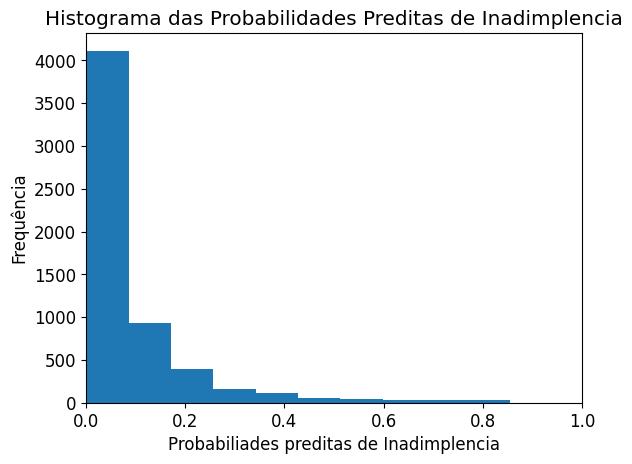

In [101]:
y_pred1 = logreg.predict_proba(X_test)[:, 1]

plt.rcParams['font.size'] = 12

plt.hist(y_pred1, bins = 10)

plt.title('Histograma das Probabilidades Preditas de Inadimplencia')

plt.xlim(0,1)

plt.xlabel('Probabiliades preditas de Inadimplencia')
plt.ylabel('Frequência')

Vemos que o histograma é bem enviesado positivamente, isto é, possui um peueno número de probabilidades maiores que $0,5$, o que mostra que a maioria das predições é de que o cliente **não será inadimplente**

---
## 5. Aprimorando o Modelo

### 5.1. Recursive Feature Elimination com Cross Validation


- **Recursive feature elimination (RFE):** É uma técnica de seleção de características, que nos ajuda a selecionar as melhores características do modelo. Inicialmente, o modelo é construído com base em todas as características fornecidas, em seguida, o preditor menos útil é removido e o modelo é construído novamente. Esse processo é repetido até que todas as características sem importância sejam removidas do modelo.

- **Recursive Feature Elimination with Cross-Validated (RFECV):** A técnica de seleção de características seleciona o melhor subconjunto de características para o estimador, removendo de $0$ a $n$ características iterativamente usando a eliminação recursiva de características. Em seguida, seleciona o melhor subconjunto com base na precisão, na pontuação de validação cruzada ou no roc-auc do modelo.

Vamos usar isso para selecioanr as melhores característica para nosso modelo

In [102]:
#aplica os métodos
from sklearn.feature_selection import RFECV

y_train = y_train.to_numpy().ravel()

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

In [103]:
#retorna o número de características escolhidas
print("Número ideal de características : %d" % rfecv.n_features_)

Número ideal de características : 178


In [104]:
# trasforma os dados de treino
X_train_rfecv = rfecv.transform(X_train)

# treina o modelo
logreg.fit(X_train_rfecv, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [105]:
#testa o modelo nos dados de teste
X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [106]:
#retorna a acurácia dos modelo nos dados de teste
print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

Classifier score: 0.9198


Nossa acurácia original era de $0.9095$, logo ouve um aumento na acurácia porém com um conjunto reduzido de paraâmetros no modelo

### 5.2. k-Fold Cross Validation

A ideia principal da k-Fold Cross Validatio é dividir o dataset em K subconjuntos (ou "folds") de tamanhos aproximadamente iguais, onde um desse subconjuntos é escolhido como teste e os demias como treino. O processo então se repete K vezes. Neste caso vamos escolher $k = 10$


In [107]:
#aplicando 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.9176022  0.92014404 0.9262868  0.92033898 0.91716102]


In [108]:
#retorna a média da cross-validation

print('Média da cross-validation: {:.4f}'.format(scores.mean()))

Média da cross-validation: 0.9203


Podemos ver que a métrica de desempenho do modelo que era originalmente de $0.9206$ não se alterou muito. Deste modo, poemos concluir que a cross-validation não gerou um aumento de performance do modelo.

### 5.2. Revisitando a Matriz de Confusão

Vamos verificar como ficou a matriz de confrusão depois de aplicadas essas técnicas de aprimoramento do modelo.

In [109]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[5325   42]
 [ 431  103]]

True Positives(TP1) =  5325

True Negatives(TN1) =  103

False Positives(FP1) =  42

False Negatives(FN1) =  431


Conseguimos basicamente os mesmos valores presentes antes do ajuste, mas agora com parametros reduzidos

---
## 6. Aplicando o Modelo

Agora podemos alicar o modelo nos dados originalmente salvos no data frame `df_validacao` e que agora estão em `X_val` que contém informações originalmente na base de dados `base_pagamentos_teste.csv`.

#### 6.1. Preparando os Dados de Validação para a Aplicação do Modelo

Primeiro vamos aplicar o MinMax para deixar os dados na escala correta de aplicação do modelo.

In [110]:
#averiguando escalas dos dados antes do tratamento
X_val.describe()

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PRAZO_DE_CREDITO,TEMPO_COMO_CLIENTE,(1,(2,(3,(4,...,3,4,5,6,7,8,9,10,11,12
count,5304.000000,5304.000000,5.304000e+03,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,...,5304.0,5304.0,5304.0,5304.0,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.0
mean,63425.118778,5.898190,2.816712e+05,124.384992,22.492459,2459.679864,0.021870,0.003582,0.002262,0.002640,...,0.0,0.0,0.0,0.0,0.210219,0.217006,0.214932,0.225490,0.132353,0.0
std,56689.030035,1.880707,2.073143e+05,20.032144,11.881682,1714.981422,0.146274,0.059750,0.047516,0.051313,...,0.0,0.0,0.0,0.0,0.407502,0.412246,0.410814,0.417944,0.338906,0.0
min,6.000000,4.000000,9.270000e+02,0.000000,15.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,25233.750000,5.000000,1.354505e+05,114.000000,16.000000,1078.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,46445.000000,5.000000,2.405020e+05,123.000000,18.000000,2172.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,80312.000000,6.000000,3.751088e+05,136.000000,25.000000,3434.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,484050.000000,11.000000,1.564439e+06,182.000000,196.000000,7544.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [111]:
#mudando os tipos de nomes das colunas para strings para aplicar o MinMax
X_val.columns = X_val.columns.astype(str)

#selecionando os nomes atuais das colunas para depois aplicar no data frame com
cols = X_val.columns

In [112]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

#aplicando MinMax
X_val = scalar.fit_transform(X_val)

#convertendo novamente para um conjunto de dados
X_val = pd.DataFrame(X_val, columns = cols)

In [113]:
#verificando mudanças feitas nos dados
X_val.describe()

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PRAZO_DE_CREDITO,TEMPO_COMO_CLIENTE,(1,(2,(3,(4,...,3,4,5,6,7,8,9,10,11,12
count,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,...,5304.0,5304.0,5304.0,5304.0,5304.000000,5304.000000,5304.000000,5304.000000,5304.000000,5304.0
mean,0.131019,0.271170,0.179560,0.683434,0.041395,0.325776,0.021870,0.003582,0.002262,0.002640,...,0.0,0.0,0.0,0.0,0.210219,0.217006,0.214932,0.225490,0.132353,0.0
std,0.117115,0.268672,0.132595,0.110067,0.065645,0.227421,0.146274,0.059750,0.047516,0.051313,...,0.0,0.0,0.0,0.0,0.407502,0.412246,0.410814,0.417944,0.338906,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.052119,0.142857,0.086039,0.626374,0.005525,0.142554,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.095940,0.142857,0.153229,0.675824,0.016575,0.287628,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.165906,0.285714,0.239321,0.747253,0.055249,0.454979,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


#### 6.2. Aplicando o Modelo nos Dados de Validação

Agora podemos aplicar o modelo já treinado nas etapas anteriores nos dados de validação.

In [114]:
#Aplicando a redução de características rfecv
X_val_rfecv = rfecv.transform(X_val)

In [115]:
#Aplicando o modelo nos dados de validação
y_preditos_validacao = logreg.predict(X_val_rfecv)
y_preditos_validacao

array([0, 0, 0, ..., 0, 0, 0], shape=(5304,))

Aplicando o método predict_proba para calcular a probabilidade da variavel ser 0 (não inadimplente) ou 1 (inadimplente).

In [116]:
logreg.predict_proba(X_val_rfecv)[:,0]

array([0.99570094, 0.98696974, 0.9872082 , ..., 0.91095531, 0.99651507,
       0.99312153], shape=(5304,))

In [117]:
logreg.predict_proba(X_val_rfecv)[:,1]

array([0.00429906, 0.01303026, 0.0127918 , ..., 0.08904469, 0.00348493,
       0.00687847], shape=(5304,))

#### 6.3. Vendo as predições

Podemos ver também a quantidade de clientes que são possiveis Inadimplentes ou não, assim como ter uma idéia da frequência em que o modelo calssificou cada cliente por meio de um histograma.

In [118]:
y_preditos_validacao_df = pd.DataFrame(data = y_preditos_validacao, columns= ['INADIMPLENTES'])
y_preditos_validacao_df.value_counts()

INADIMPLENTES
0                5279
1                  25
Name: count, dtype: int64

In [119]:
#retorna as 10 preimeiras probabiliades previstas para as classe 0 ou 1
y_pred_prob_val = logreg.predict_proba(X_val_rfecv)[0:10]

#armazena essa probabilidades em um DataFrame
y_pred_prob_df_val = pd.DataFrame(data=y_pred_prob_val, columns=['Probabiliade de ser - Não Inadimplente (0)', 'Probabiliade de ser - Inadimplente (1)'])

y_pred_prob_df_val

,Probabiliade de ser - Não Inadimplente (0),Probabiliade de ser - Inadimplente (1)
0,0.995701,0.004299
1,0.986970,0.013030
2,0.987208,0.012792
3,0.987380,0.012620
4,0.996045,0.003955
5,0.996025,0.003975
6,0.995876,0.004124
7,0.995900,0.004100
8,0.970092,0.029908
9,0.968587,0.031413


Text(0, 0.5, 'Frequência')

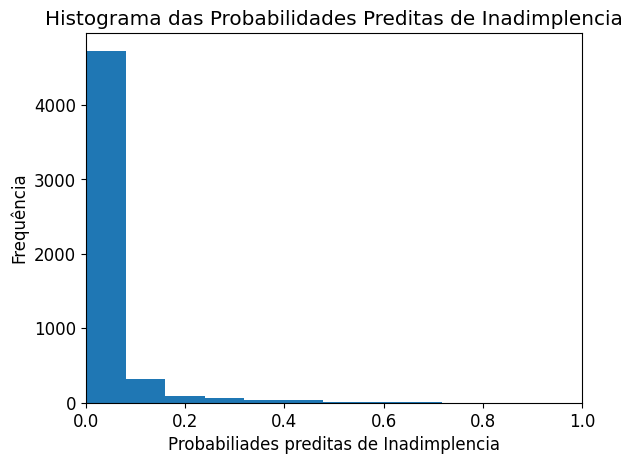

In [120]:
#cria um histograma comm as frequências das classificações feitas pelo modelo
y_pred2 = logreg.predict_proba(X_val_rfecv)[:, 1]

plt.rcParams['font.size'] = 12

plt.hist(y_pred2, bins = 10)

plt.title('Histograma das Probabilidades Preditas de Inadimplencia')

plt.xlim(0,1)

plt.xlabel('Probabiliades preditas de Inadimplencia')
plt.ylabel('Frequência')

---
## 7. Considerações Finais

### 7.1. Resultados e Conclusão

1. O modelo possui uma alta acurácia de $0.9198$, fazendo assim um bom trabalho em prever clientes inadimplentes ou não.


2. Temos uma alta precisão, especialmente referente aos dados classificados como negativos (não inadimplentes), com isso o modelo menos clientes não inadimplentes são classificados de forma errada.


3. Um ponto preocupante é o baixo recall nos dados positivos (inadimplentes), isso indica que uma grande taxa de falsos negativos para com os clientes inadimplentes.


4. O baixo f1 nos dados positivos (inadimplentes) é consequência do baixo recall nestes, o que mostra que apesar do modelo ter uma baixa taxa de falsos positivos, possivelmente ele tem uma alta taxa de falsos negativos.


5. O baixo valor da àrea sobre a curva ROC de $0.5925$, indica que o modelo apesar de preciso e de boa acurácia, não tem desempenho muito elevado se comparado com o modelo puramente aleatório, que para comparação tem área sobre a curva ROC de $0.5$.


6. Os métodos de aprimoramento do modelo, apesar de reduzirem o número de parâmetros que era originalmente 193 para 178, melhorando assim a eficiência do modelo sem prejudicar sua acurácia e demais métricas, pouco foram efetivos na melhora do recall ou área sobre a curva ROC.


7. De modo geral, o modelo é bom para a classificação de clientes tido como inadimplentes, seus indicadores são resultado possivelmente de uma baixa frequência de clientes inadimplentes, em comparação com os não inadimplentes, fazendo assim o modelo a tender a classificar pelos dados mais frequentes.


8. Dito isso, as recomendações futuras devem focar em abordar o desequilíbrio de classes e melhorar a capacidade do modelo de identificar a classe minoritária, nesse caso os clientes não inadimplentes. Para isso podem ser empregadas técnicas como:
  - Ponderação de classes (Class Weighting), fornecer um dicionário de pesos para dar mais importância à classe minoritária (inadimplentes) durante o treinamento. Isso fará com que o modelo penalize mais os erros na previsão da classe positiva.

  - Técnicas de reamostragem como sobreamostragem ou subamostragem, que aumente o número de amostras da classe inadimplente ou diminui os de não inadimplente.

  - Otimização do Ponto de Corte (Threshold), fazendo com que seja mais provavel que um cliente seja classificado como inadimplente, pois por padrão, um cliente é classificado como inadimplente se a probabilidade for $≥0.5$.

### 7.2. Fontes

Seguem as fontes usadas como consulta para a criação desse modelo.

- [Logistic Regression with Python and Scikit-Learn](https://gist.github.com/pb111/62067d128be7f7f86e81916ff946af7b)

- [1.1. Linear Models — scikit-learn 1.7.0 documentation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

- [Repositório Institucional da Universidade Federal de Rondônia: Modelo para previsão de inadimplência utilizando a regressão logística aplicado a tomadores de crédito de uma instituição financeira da cidade de Ji Paraná](https://ri.unir.br/jspui/handle/123456789/3062)

- [Wikipedia Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)